# ***Credit Risk Modelling***

**Using German Credit Data Dataset**

In [1]:
import pandas as pd

In [29]:
df=pd.read_csv("C:\\Users\\engr-\\OneDrive\\Desktop\\Portfolio Projects\\german_credit.csv")
df.columns = ['Creditability', 'Account Balance', 'Duration of Credit', 'Payment Status of Previous credit', 'purpose', 'Credit Amount', 'Value Savings/Stocks', 'Duration of Current Employment', 'Installment percent', 'Sex and Marital Status', 'Duration in current address', 'Most Valuable available asset', 'Age', 'Concurrent Credits', 'Type of Apartment', 'No. of credits at this bank', 'Occupation', 'Number of Dependents', 'own_telephone', 'foreign_worker', 'credit_risk']


In [3]:
df.head(2)

,Creditability,Account Balance,Duration of Credit,Payment Status of Previous credit,purpose,Credit Amount,Value Savings/Stocks,Duration of Current Employment,Installment percent,Sex and Marital Status,...,Most Valuable available asset,Age,Concurrent Credits,Type of Apartment,No. of credits at this bank,Occupation,Number of Dependents,own_telephone,foreign_worker,credit_risk
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1


## ***Data Cleaning***

### Handling Missing Values ###

In [4]:
#replacing missing values in a coloumn with the mean value
df.fillna(df.mean(),inplace=True)

In [5]:
df.head(1000)

,Creditability,Account Balance,Duration of Credit,Payment Status of Previous credit,purpose,Credit Amount,Value Savings/Stocks,Duration of Current Employment,Installment percent,Sex and Marital Status,...,Most Valuable available asset,Age,Concurrent Credits,Type of Apartment,No. of credits at this bank,Occupation,Number of Dependents,own_telephone,foreign_worker,credit_risk
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


### Handling Outliers

In [6]:
import numpy as np

In [7]:
Q1=df.quantile(0.25) #Calculating first quartile of each column
Q3=df.quantile(0.75) #Calculating third quartile of each column
IQR=Q3-Q1            #Calculating the interquartile range
#identifying the potential outliers by defining a range for normal values using interquartile range
lower_range= Q1-1.5*IQR
upper_range= Q3+1.5*IQR
#replacing the outliers with the maxx/min values within the normal range
df=df.clip(lower_range,upper_range, axis=1)

print(df.head())

   Creditability  Account Balance  Duration of Credit  \
0              1                1                  18   
1              1                1                   9   
2              1                2                  12   
3              1                1                  12   
4              1                1                  12   

   Payment Status of Previous credit  purpose  Credit Amount  \
0                                  4        2         1049.0   
1                                  4        0         2799.0   
2                                  2        6          841.0   
3                                  4        0         2122.0   
4                                  4        0         2171.0   

   Value Savings/Stocks  Duration of Current Employment  Installment percent  \
0                     1                               2                    4   
1                     1                               3                    2   
2                     2         

C:\Users\engr-\AppData\Local\Temp\ipykernel_4948\2944609825.py:8: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df=df.clip(lower_range,upper_range, axis=1)


In [8]:
df.head()

,Creditability,Account Balance,Duration of Credit,Payment Status of Previous credit,purpose,Credit Amount,Value Savings/Stocks,Duration of Current Employment,Installment percent,Sex and Marital Status,...,Most Valuable available asset,Age,Concurrent Credits,Type of Apartment,No. of credits at this bank,Occupation,Number of Dependents,own_telephone,foreign_worker,credit_risk
0,1,1,18,4,2,1049.0,1,2,4,2,...,4,2,21.0,3,2,1.0,3,1,1,1
1,1,1,9,4,0,2799.0,1,3,2,3,...,2,1,36.0,3,2,2.0,3,1,1,1
2,1,2,12,2,6,841.0,2,4,2,2,...,4,1,23.0,3,2,1.0,3,1,1,1
3,1,1,12,4,0,2122.0,1,3,3,3,...,2,1,39.0,3,2,2.0,3,1,1,1
4,1,1,12,4,0,2171.0,1,3,4,3,...,4,2,38.0,3,2,2.0,3,1,1,1


In [9]:
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

In [10]:
#checking for missing values again
print(df.isnull().sum().sum())

0


In [11]:
#checking for outliers
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
outliers = df[abs_z_scores > 3]

In [12]:
num_outliers = ((df < lower_range) | (df > upper_range)).sum()

# Print the number of potential outliers in each column
print(num_outliers)

Creditability                        0
Account Balance                      0
Duration of Credit                   0
Payment Status of Previous credit    0
purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Duration of Current Employment       0
Installment percent                  0
Sex and Marital Status               0
Duration in current address          0
Most Valuable available asset        0
Age                                  0
Concurrent Credits                   0
Type of Apartment                    0
No. of credits at this bank          0
Occupation                           0
Number of Dependents                 0
own_telephone                        0
foreign_worker                       0
credit_risk                          0
dtype: int64


<AxesSubplot:>

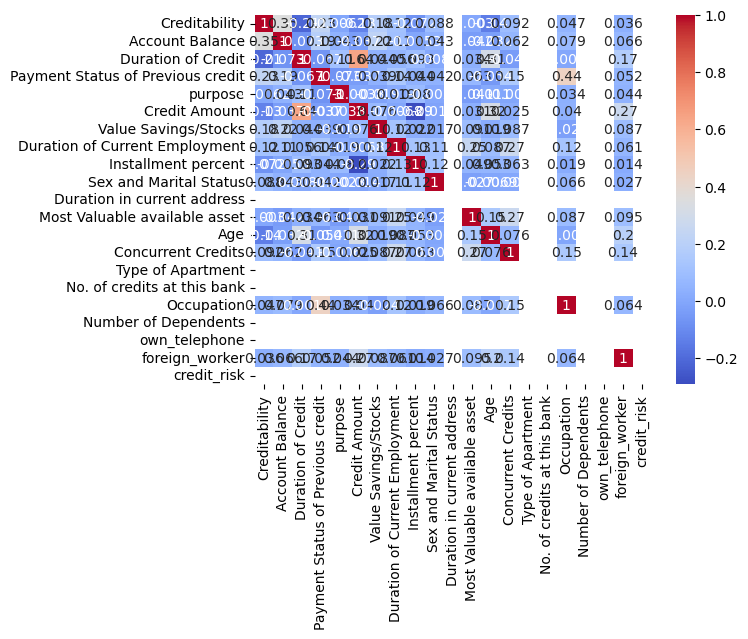

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

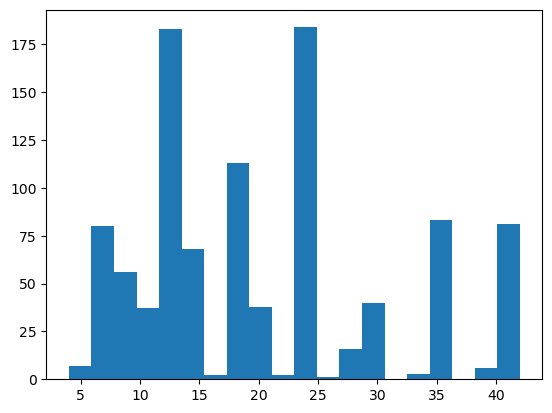

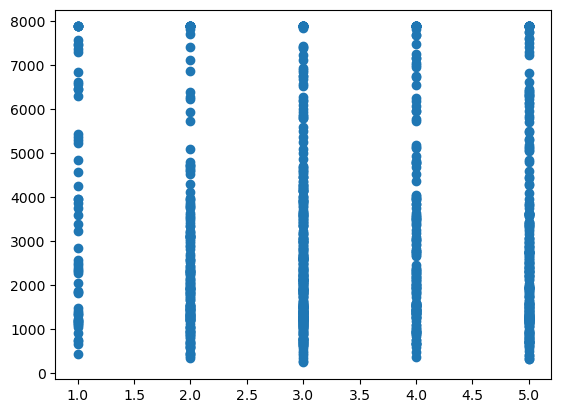

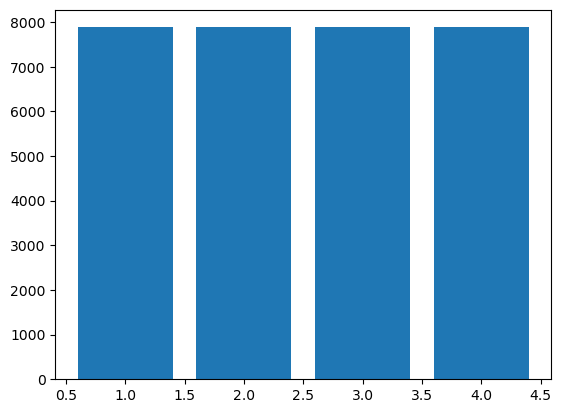

In [14]:
plt.hist(df['Duration of Credit'], bins=20)
plt.show()

plt.scatter(df['Duration of Current Employment'], df['Credit Amount'])
plt.show()

plt.bar(df['Age'], df['Credit Amount'])
plt.show()

# Data Visualization

In [17]:
import plotly.express as px
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049.0,1,2,4,2,...,4,2,21.0,3,2,1.0,3,1,1,1
1,1,1,9,4,0,2799.0,1,3,2,3,...,2,1,36.0,3,2,2.0,3,1,1,1
2,1,2,12,2,6,841.0,2,4,2,2,...,4,1,23.0,3,2,1.0,3,1,1,1
3,1,1,12,4,0,2122.0,1,3,3,3,...,2,1,39.0,3,2,2.0,3,1,1,1
4,1,1,12,4,0,2171.0,1,3,4,3,...,4,2,38.0,3,2,2.0,3,1,1,1


In [24]:
df.columns = ['Creditability', 'Account Balance', 'Duration of Credit', 'Payment Status of Previous credit', 'purpose', 'Credit Amount', 'Value Savings/Stocks', 'Duration of Current Employment', 'Installment percent', 'Sex and Marital Status', 'Duration in current address', 'Most Valuable available asset', 'Age', 'Concurrent Credits', 'Type of Apartment', 'No. of credits at this bank', 'Occupation', 'Number of Dependents', 'own_telephone', 'foreign_worker', 'credit_risk']


In [25]:
df.head()

,Creditability,Account Balance,Duration of Credit,Payment Status of Previous credit,purpose,Credit Amount,Value Savings/Stocks,Duration of Current Employment,Installment percent,Sex and Marital Status,...,Most Valuable available asset,Age,Concurrent Credits,Type of Apartment,No. of credits at this bank,Occupation,Number of Dependents,own_telephone,foreign_worker,credit_risk
0,1,1,18,4,2,1049.0,1,2,4,2,...,4,2,21.0,3,2,1.0,3,1,1,1
1,1,1,9,4,0,2799.0,1,3,2,3,...,2,1,36.0,3,2,2.0,3,1,1,1
2,1,2,12,2,6,841.0,2,4,2,2,...,4,1,23.0,3,2,1.0,3,1,1,1
3,1,1,12,4,0,2122.0,1,3,3,3,...,2,1,39.0,3,2,2.0,3,1,1,1
4,1,1,12,4,0,2171.0,1,3,4,3,...,4,2,38.0,3,2,2.0,3,1,1,1


In [21]:
import dash

In [27]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Define the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1('German Credit Data Dashboard'),
    html.Div([
        dcc.Graph(id='scatter-plot'),
        dcc.Graph(id='bar-plot')
    ], style={'display': 'flex', 'flex-wrap': 'wrap', 'justify-content': 'center'}),
    html.Div([
        dcc.Dropdown(
            id='purpose-dropdown',
            options=[{'label': 'All Purposes', 'value': 'all'}] + [{'label': i, 'value': i} for i in df['purpose'].unique()],
            value='all'
        ),
        dcc.RadioItems(
            id='status-radio',
            options=[{'label': i, 'value': i} for i in df['Creditability'].unique()],
            value=df['Creditability'].unique()[0],
            labelStyle={'display': 'inline-block', 'margin-right': '10px'}
        )
    ], style={'display': 'flex', 'justify-content': 'center', 'align-items': 'center'})
])

# Define the callback function for the scatter plot
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('purpose-dropdown', 'value'), Input('status-radio', 'value')]
)
def update_scatter_plot(purpose, creditability):
    filtered_df = df[df['Creditability'] == creditability]
    if purpose != 'all':
        filtered_df = filtered_df[filtered_df['purpose'] == purpose]
    fig = px.scatter(filtered_df, x='Credit Amount', y='Duration of Credit', color='credit_risk', hover_data=['purpose', 'Creditability'])
    fig.update_layout(title='Credit Amount vs. Loan Duration', xaxis_title='Credit Amount', yaxis_title='Loan Duration')
    return fig

# Define the callback function for the bar plot
@app.callback(
    Output('bar-plot', 'figure'),
    [Input('purpose-dropdown', 'value'), Input('status-radio', 'value')]
)
def update_bar_plot(purpose, creditability):
    filtered_df = df[df['Creditability'] == creditability]
    if purpose != 'all':
        filtered_df = filtered_df[filtered_df['purpose'] == purpose]
    grouped_df = filtered_df.groupby(['credit_risk', 'purpose']).size().reset_index(name='count')
    fig = px.bar(grouped_df, x='purpose', y='count', color='credit_risk', barmode='group')
    fig.update_layout(title='Number of Loans by Purpose', xaxis_title='Loan Purpose', yaxis_title='Number of Loans')
    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Running on http://127.0.0.1:8050/
Debugger PIN: 255-060-361
Debugger PIN: 255-060-361
Debugger PIN: 255-060-361
Debugger PIN: 255-060-361
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

H:\anaconda installed\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [28]:
app.run_server(port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


In [29]:
exit

In [18]:
df.head()

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049.0,1,2,4,2,...,4,2,21.0,3,2,1.0,3,1,1,1
1,1,1,9,4,0,2799.0,1,3,2,3,...,2,1,36.0,3,2,2.0,3,1,1,1
2,1,2,12,2,6,841.0,2,4,2,2,...,4,1,23.0,3,2,1.0,3,1,1,1
3,1,1,12,4,0,2122.0,1,3,3,3,...,2,1,39.0,3,2,2.0,3,1,1,1
4,1,1,12,4,0,2171.0,1,3,4,3,...,4,2,38.0,3,2,2.0,3,1,1,1


# Building the model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib


# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Account Balance', 'Payment Status of Previous credit', 'purpose', 'Value Savings/Stocks', 'Duration of Current Employment', 'Sex and Marital Status', 'Most Valuable available asset', 'Concurrent Credits', 'Type of Apartment', 'Occupation', 'Number of Dependents', 'own_telephone', 'foreign_worker'])

# Separate the target variable and features
X = df.drop('Creditability', axis=1)
y = df['Creditability']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model to a file
#joblib.dump(model, 'credit_risk_model.pkl')


              precision    recall  f1-score   support

           0       0.60      0.48      0.54        62
           1       0.79      0.86      0.82       138

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.73      0.74      0.73       200



## Fine Tune the Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

# Separate the target variable and features
X = df.drop('Creditability', axis=1)
y = df['Creditability']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(random_state=42, penalty='l2')
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Save the model to a file
#joblib.dump(model, 'credit_risk_model.pkl')


              precision    recall  f1-score   support

           0       0.60      0.48      0.54        62
           1       0.79      0.86      0.82       138

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.73      0.74      0.73       200



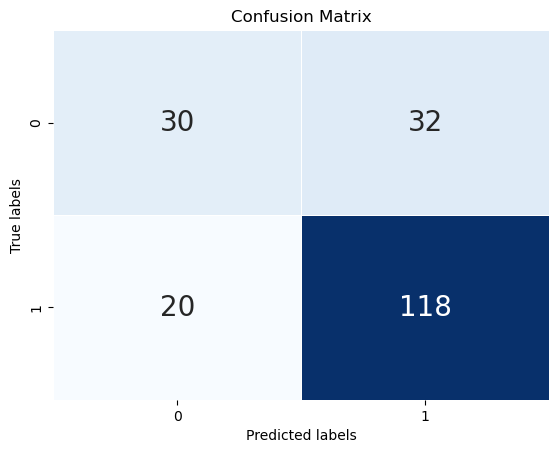

            Score
Metric           
Accuracy   0.7400
Precision  0.7867
Recall     0.8551
F1 Score   0.8194
AUC-ROC    0.6695


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Calculate evaluation metrics
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size": 20}, linewidths=0.5)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Create a table to display other evaluation metrics
data = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'], 
        'Score': [accuracy, precision, recall, f1, auc_roc]}
df = pd.DataFrame(data)
df['Score'] = df['Score'].apply(lambda x: round(x, 4))
df.set_index('Metric', inplace=True)
print(df)
